### https://wikidocs.net/49632 데이터셋 설명
## 이 데이터는 8X8 데이터로 구성되어 있음
8x8의 명암을 위주로 데이터를 보여줌.

그렇기에, digit.data / digit.target 으로 학습시킴

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

digit = datasets.load_digits()

In [2]:
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digit.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

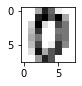

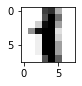

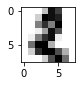

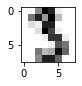

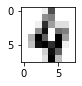

In [3]:
for i in range(5):
    plt.figure(figsize=(1,1))
    plt.imshow(digit.images[i],cmap=plt.cm.gray_r , interpolation ='nearest')

## 책에서 제시한 방법

In [4]:
from sklearn import datasets
from sklearn import svm

digit = datasets.load_digits()

# svm의 분류기 모델 SC를 학습
s=svm.SVC(gamma=0.1, C=10)
s.fit(digit.data, digit.target) # digit 데이터로 모델링

# 훈련 집합의 앞에 있는 샘플 3개를 새로운 샘플로 간주하고 인식해봄
new_d = [digit.data[0], digit.data[1], digit.data[2]]
res = s.predict(new_d)
print("예측값은", res)
print("참값은", digit.target[0], digit.target[1], digit.target[2])

# 훈련 집합을 테스트 집합으로 간주하여 인식해보고 정확률을 측정
res = s.predict(digit.data)
correct = [i for i in range(len(res)) if res[i] == digit.target[i]]
accuracy=len(correct)/len(res)
print("화소 특징을 사용했을 때 정확률=",accuracy*100,"%")

예측값은 [0 1 2]
참값은 0 1 2
화소 특징을 사용했을 때 정확률= 100.0 %


In [ ]:
# 여기서는 훈련할 때 digit.data를 사용함

# train test split 해서 풀어보기 (digit.data)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [45]:
X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size=0.3, random_state=1)

In [46]:
len(X_test)

540

In [47]:
s = svm.SVC(gamma=0.1, C=10)
s.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [48]:
# 모델 평가
score = s.score(X_test, y_test)
print("모델의 점수는 {}입니다".format(round(score,2)))

모델의 점수는 0.09입니다


### 여기서 왜 0.08이 나올까?ㅠㅠ

# digit.images를 활용해 풀어보기

In [51]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [27]:
# 이미지 병합
n_samples = len(digit.images)
data = digit.images.reshape((n_samples, -1))

# 분류기 만들기 : 지원 벡터 분류기
clf = svm.SVC(gamma=0.001)

# 데이터를 50 % 훈련 및 50 % 테스트 하위 집합으로 분할
X_train, X_test, y_train, y_test = train_test_split(
    data, digit.target, test_size=0.3, shuffle=False)

# 기차 하위 집합의 숫자 알아보기
clf.fit(X_train, y_train)

# 모델 평가
score = clf.score(X_test, y_test)
print("모델의 점수는 {}입니다".format(round(score,2)))

모델의 점수는 0.97입니다


In [28]:
# s 모델을 활용해 X_test를 predict 하고 이를 y_test와 비교해 confusion matrix 구하기
pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion = confusion_matrix(y_test, pred)
confusion

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  2,  0,  0,  4,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 53]], dtype=int64)

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average='micro')


0.9703703703703703